In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.display import display, Markdown

import pandas as pd
import numpy as np

import json

%load_ext jupyter_ai

np.__version__

'1.23.4'

In [2]:
# %ai list

In [3]:
# %%ai gpt4
# What are some beloved features of python that Javascript lacks?

# Load, prep data

### Prep love song subtypes

In [4]:
love_song_subtype_df = pd.read_csv('./data/15-OUTPUT-gpt4-love-song-subtypes-rough-draft.csv')
love_song_subtype_df

,performer,song,justification,love_song_sub_type
0,A Taste Of Honey,Sukiyaki,about overcoming a love lost with hope,Heartbreak & Longing
1,"A$AP Rocky Featuring Drake, 2 Chainz & Kendric...",F**kin Problems,about the singers' sexual prowess,Sexual Conquest
2,A'me Lorain,"Whole Wide World (From ""True Love"")","about love being everywhere, not a typical lov...",none
3,ABBA,Dancing Queen,"about enjoying life and dance, not about roman...",none
4,ABBA,Take A Chance On Me,about asking someone to take a chance on love,Serenade
...,...,...,...,...
4859,Will To Power,I'm Not In Love,"claiming not to be in love, but potentially ye...",Heartbreak & Longing
4860,William Bell,Tryin' To Love Two,about trying to maintain two relationships cou...,It's Complicated
4861,William DeVaughn,Be Thankful For What You Got,"about appreciating what you have, not specific...",none
4862,Willie Nelson,Always On My Mind,expressing regret at not showing love well enough,Heartbreak & Longing


In [5]:
gender_df = pd.read_csv('./data/11-OUTPUT-with-gender-from-gpt4.csv')
date_as_decimal = (gender_df.chart_debut_date_normalized_0_to_1 / 100) * (2023 - 1959) + 1959
date_as_decimal
gender_df['date_as_decimal'] = date_as_decimal
gender_df

grouped_by_song_df = gender_df.groupby(['performer', 'song']).first().reset_index()
grouped_by_song_df

,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1,genre_position_band,near_neighbors_count,gender,date_as_decimal
0,"""Weird Al"" Yankovic",White & Nerdy,ROCK,They see me mowin' my front lawn,2006-10-14,50.912490,44.870985,74.845,10.0,0,m,2006.90080
1,'N Sync,(God Must Have Spent) A Little More Time On You,POP,Yeah...,1998-12-05,81.288336,39.382591,62.655,0.0,12,m,1999.09920
2,'N Sync,Bye Bye Bye,POP,"Hey, hey",2000-01-29,71.402847,30.184848,64.441,0.0,14,m,2000.24224
3,'N Sync,It's Gonna Be Me,POP,(It's gonna be me),2000-05-06,68.789522,53.089582,64.860,0.0,0,m,2000.51040
4,'N Sync,This I Promise You,POP,Oh oh oh oh,2000-09-30,74.214520,30.421922,65.481,0.0,14,m,2000.90784
...,...,...,...,...,...,...,...,...,...,...,...,...
5011,matchbox twenty,Unwell,ROCK,All day,2003-03-22,56.149341,35.176103,69.317,10.0,7,m,2003.36288
5012,twenty one pilots,Heathens,ROCK,"All my friends are heathens, take it slow (In ...",2016-07-09,58.202752,54.398868,89.969,10.0,0,m,2016.58016
5013,twenty one pilots,Ride,ROCK,I just wanna stay in the sun where I find,2016-04-02,48.387025,35.286120,89.550,10.0,1,m,2016.31200
5014,twenty one pilots,Stressed Out,ROCK,I wish I found some better sounds no one's eve...,2015-05-16,60.782772,37.133766,88.183,10.0,1,m,2015.43712


### Merge just the ones from subtype (ie cuz that's the subset that GPT actually had data for)

In [6]:
df = grouped_by_song_df.merge(love_song_subtype_df, on=['performer', 'song'], how='inner')
df.love_song_sub_type.value_counts()
df[['performer', 'song', 'justification', 'love_song_sub_type']][
    df.performer.str.contains('Justin Bieber')
]

,performer,song,justification,love_song_sub_type
184,Ariana Grande & Justin Bieber,Stuck With U,celebrates the idea of being stuck with someon...,Serenade
948,"DJ Khaled Featuring Justin Bieber, Quavo, Chan...",I'm The One,insinuating the speaker’s desirability,Sexual Conquest
952,DJ Snake Featuring Justin Bieber,Let Me Love You,pleading someone to let them love them,Serenade
964,Dan + Shay & Justin Bieber,"10,000 Hours",The song describes how they could spend thousa...,Serenade
1289,Ed Sheeran & Justin Bieber,I Don't Care,about contentment with a lover despite difficu...,Serenade
2155,Justin Bieber,Anyone,This is a dedication of undying love and fits ...,Serenade
2156,Justin Bieber,Boyfriend,"Proposing himself as a boyfriend, possibly fit...",Sexual Conquest
2157,Justin Bieber,Ghost,"Grief over a lost love, would fit into Heartbr...",Heartbreak & Longing
2158,Justin Bieber,Love Yourself,"A goodbye to an ex-lover, this song fits into ...",Good Riddance
2159,Justin Bieber,Sorry,The song is an apology to a past lover which m...,none


# Do preliminary exploration of love song sub types

In [7]:
LOVE_SONG_SUB_TYPES = [
    'Serenade', 'Heartbreak & Longing', 'Sexual Conquest',
       "It's Complicated", 'Good Riddance', 'Unrequited',
       'Love Songs for the Self', 'Platonic Love', 'none',
]

## How do they vary over time?

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
COLOR_MAP = {
    'none': 'gray',
    'Serenade': 'pink',
    'Heartbreak & Longing': 'blue',
    'Sexual Conquest': 'red',
    "It's Complicated": 'brown',
    'Good Riddance': 'purple',
    'Unrequited': 'green',
    'Love Songs for the Self': 'orange',
    'Platonic Love': 'yellow',
}
    
def stacked_bars_over_time(df, subtypes_to_include=LOVE_SONG_SUB_TYPES, title_prepend=''):
    # Filter the DataFrame to include only the specified subtypes
    filtered_df = df[df['love_song_sub_type'].isin(subtypes_to_include)]

    # Group by subtype and then calculate the count for each 0.25 interval in date_as_decimal
    grouped_df = filtered_df.groupby(['love_song_sub_type', (filtered_df['date_as_decimal']*4).astype(int)/4]).size().reset_index(name='count')
    grouped_df.rename(columns={'date_as_decimal': 'quarterly_decimal'}, inplace=True)

    # Pivot the DataFrame so that love_song_sub_type becomes the columns, the date is the index, and the values are the counts
    pivoted_df = grouped_df.pivot(index='quarterly_decimal', columns='love_song_sub_type', values='count').fillna(0)

    # Calculate the total number of songs for each quarterly interval
    quarterly_totals = pivoted_df.sum(axis=1)

    # Divide by the quarterly totals to get the percentages
    pivoted_df = pivoted_df.divide(quarterly_totals, axis=0) * 100

    # Apply a rolling mean with a window of size 2 to smooth over two quarters (i.e., 6 months)
    pivoted_df = pivoted_df.rolling(window=16).mean().dropna()

      # Sort the columns by their total sum to get the most popular category on top
    sorted_columns = pivoted_df.sum().sort_values(ascending=True).index
    pivoted_df = pivoted_df[sorted_columns]

    # Define the colors for the areas based on the sorted columns
    colors = [COLOR_MAP[subtype] for subtype in sorted_columns]

    # Create a stacked area plot with the specified colors
    plt.figure(figsize=(15, 8))
    stack_coll = plt.stackplot(pivoted_df.index, pivoted_df.T, colors=colors, alpha=0.5)

    # Label the areas directly on the plot, centered within each area
    for i, subtype in enumerate(sorted_columns):
        y_offset = pivoted_df.iloc[:, :i].sum(axis=1).rolling(window=2).mean().dropna().values
        y_values = pivoted_df[subtype].rolling(window=2).mean().dropna().values
        y_mid = y_offset + y_values / 2
        x_values = pivoted_df.index
        plt.text(x_values[len(x_values)//2], y_mid[len(y_mid)//2], subtype, ha='center', va='center')

    plt.title(f'{title_prepend} Love Song Subtypes Over Time (percentage of total, rolling average)')
    plt.xlabel('Year')
    plt.xlim(1958, 2022)
    plt.ylabel('Percentage of Total Songs')
    plt.show()
    


## All songs over time: 

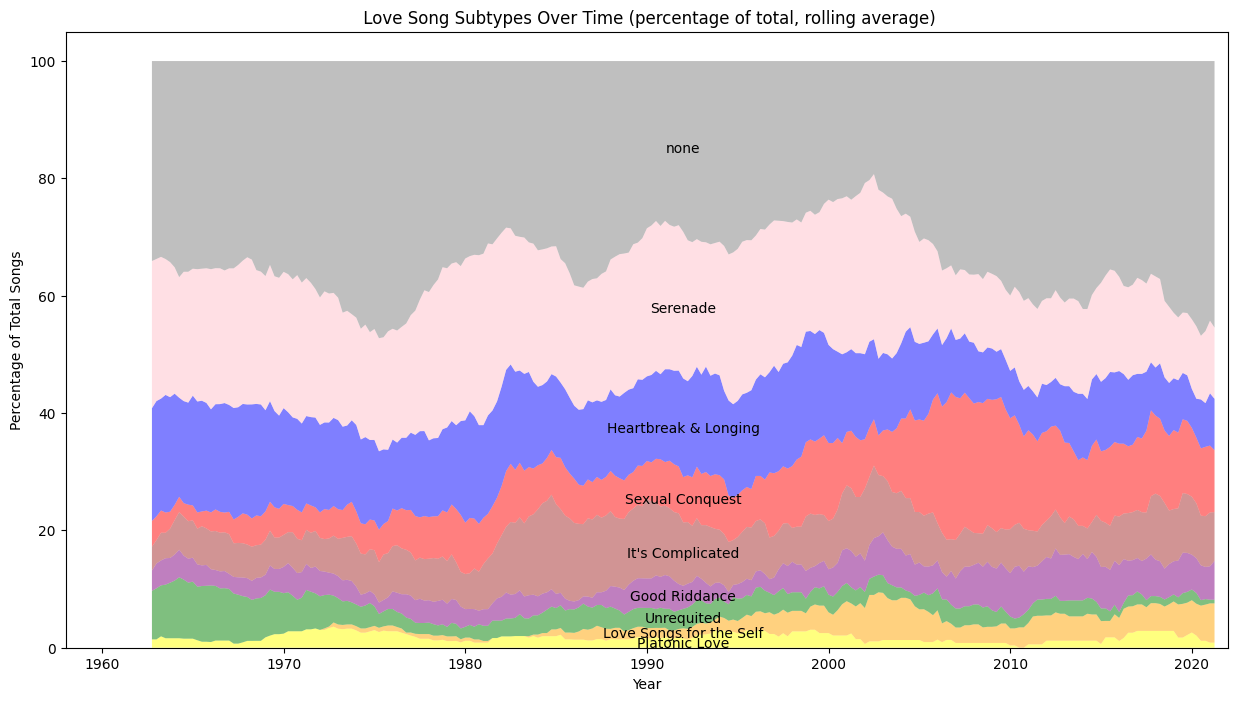

In [47]:
stacked_bars_over_time(df)

## Just the labeled love-ish song sub types: "Serenade" & "Heartbreak" is slowly replaced with categories like "Sexual Conquest", "Good Riddance", and "love songs for the self"

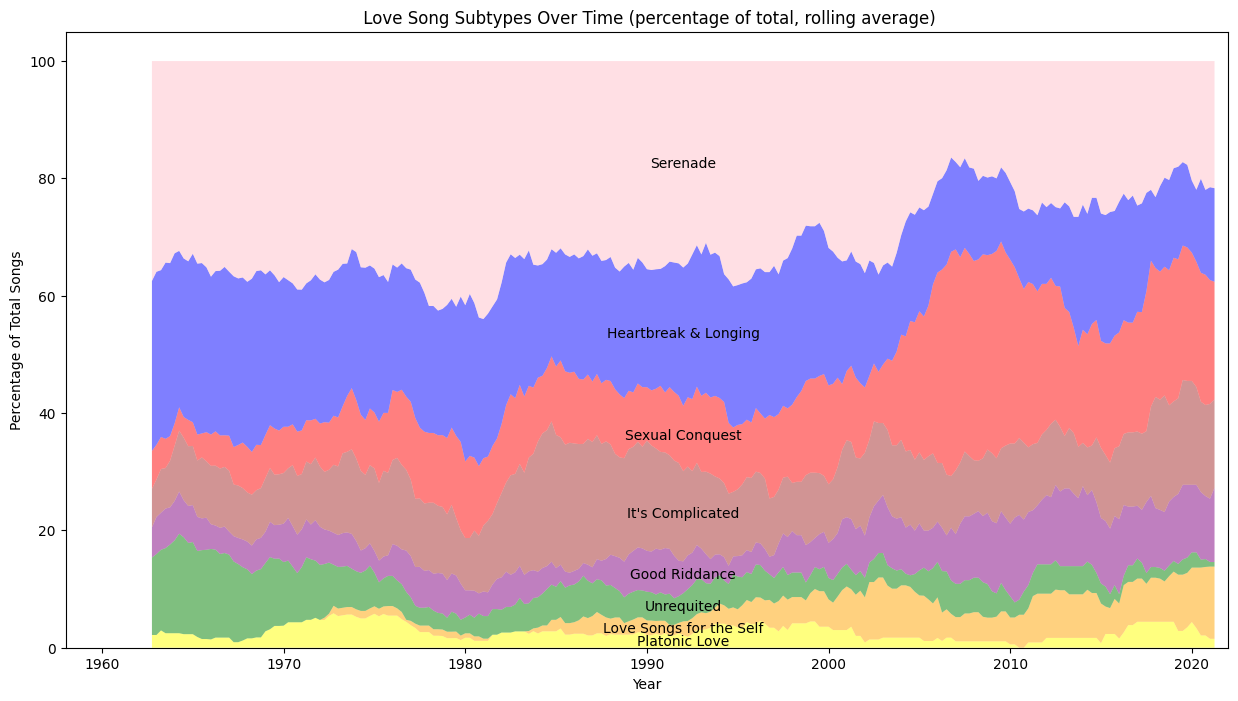

In [48]:
stacked_bars_over_time(df, [s for s in LOVE_SONG_SUB_TYPES if s != 'none'])

## Looking at just traditional categories of "love song": the love unambiguously fell off starting in 2003, and now is less than 50%

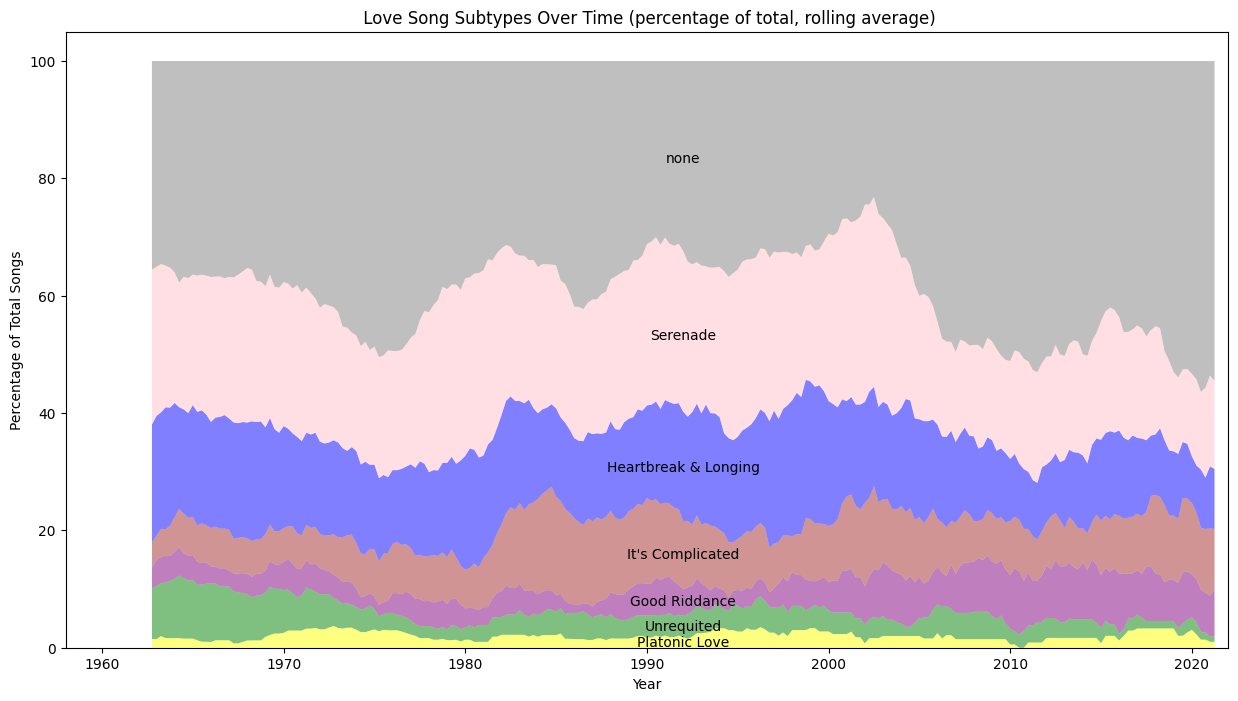

In [49]:
stacked_bars_over_time(df, [s for s in LOVE_SONG_SUB_TYPES if s not in ['Sexual Conquest', 'Love Songs for the Self']])

## Split by gender

### Women: love songs make up 75%+ (compared to men's 60%), and largely created the "love song for the self" category (dudes skip this almost entirely)
- Similar sub type ranking to men, but "It's Complicated" beats out "Sexual Conquest", especially early on
- Women have more "Good Riddance" than men
- In the 60s, "Unrequited" dominated their songs
- 

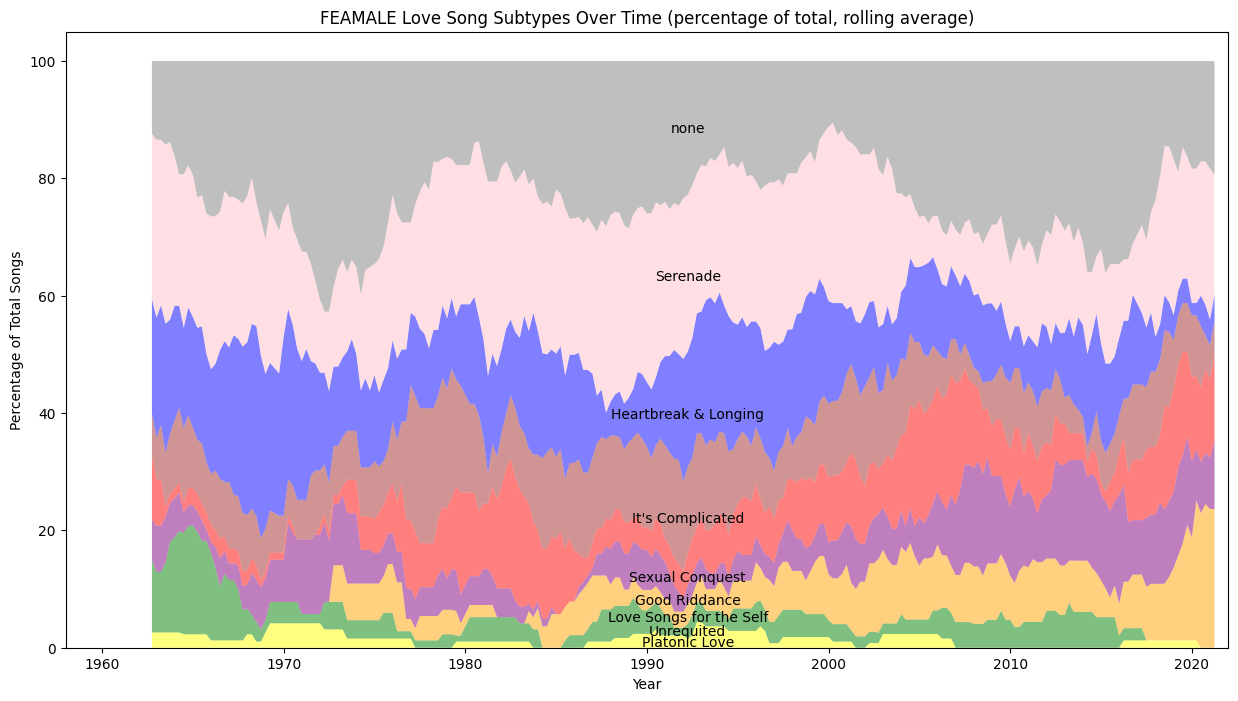

In [50]:
stacked_bars_over_time(df[df.gender == 'f'], title_prepend='FEAMALE')

### Men:

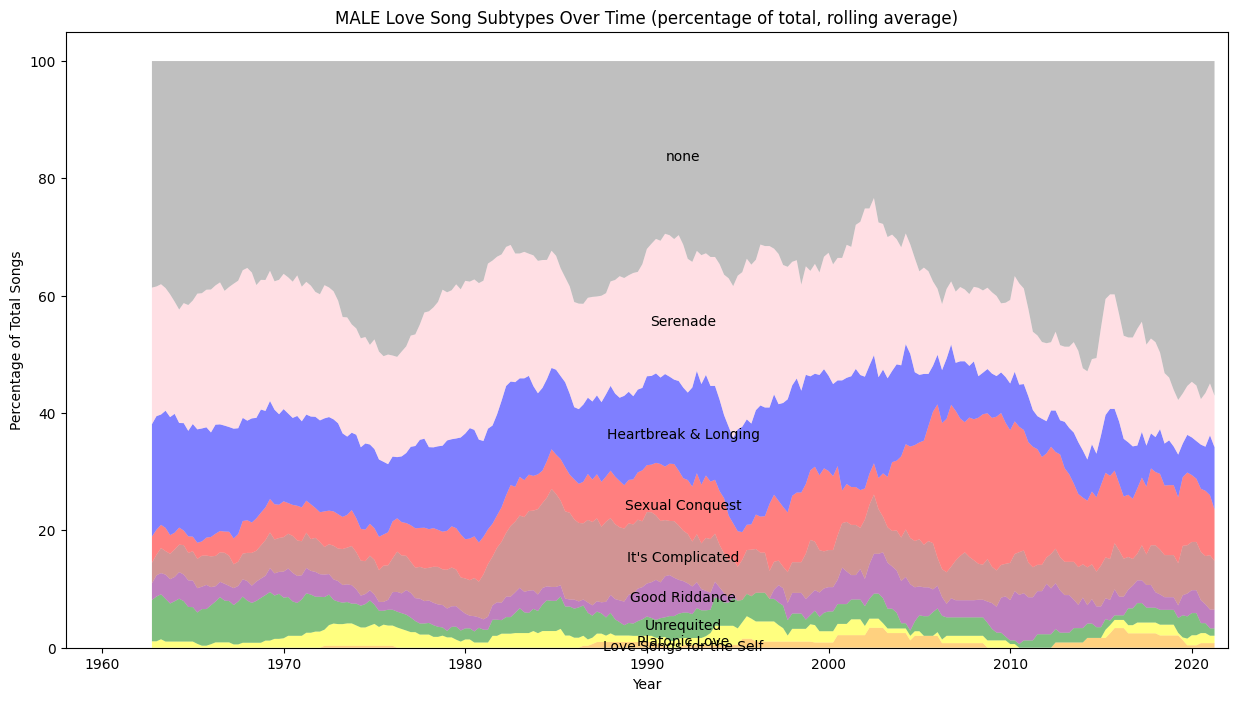

In [51]:
stacked_bars_over_time(df[df.gender == 'm'], title_prepend='MALE')

## (one hit wonders follow the general trend for what's popular)

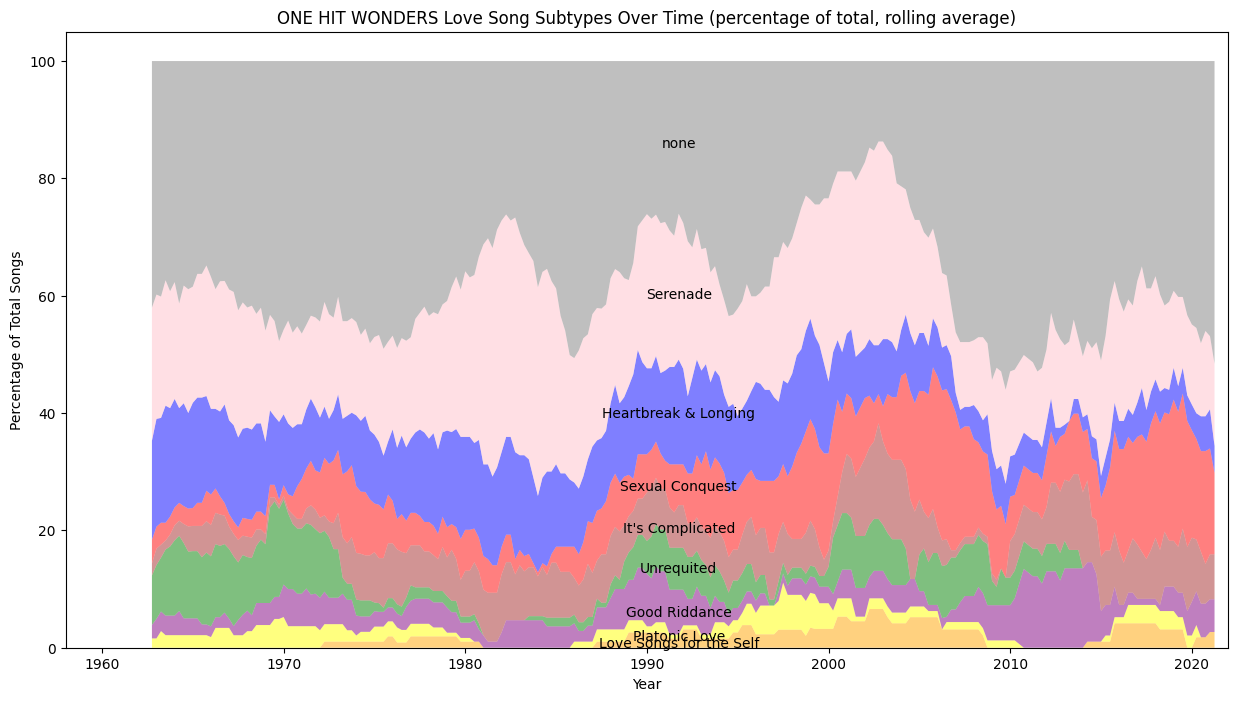

In [52]:
one_hit_wonders = df[df['primary_performer'].map(df['primary_performer'].value_counts()) == 1]
stacked_bars_over_time(
    one_hit_wonders,
    title_prepend='ONE HIT WONDERS'
)

## Genre:

In [55]:
df.generic_genre.value_counts()

POP                1801
ROCK               1015
UNCATEGORIZED       522
JAZZ_INFLUENCED     517
HIP_HOP             348
ELECTRO             252
COUNTRY             132
FUNK                 76
LATIN                40
FOLK                 40
REGGAE               11
Name: generic_genre, dtype: int64

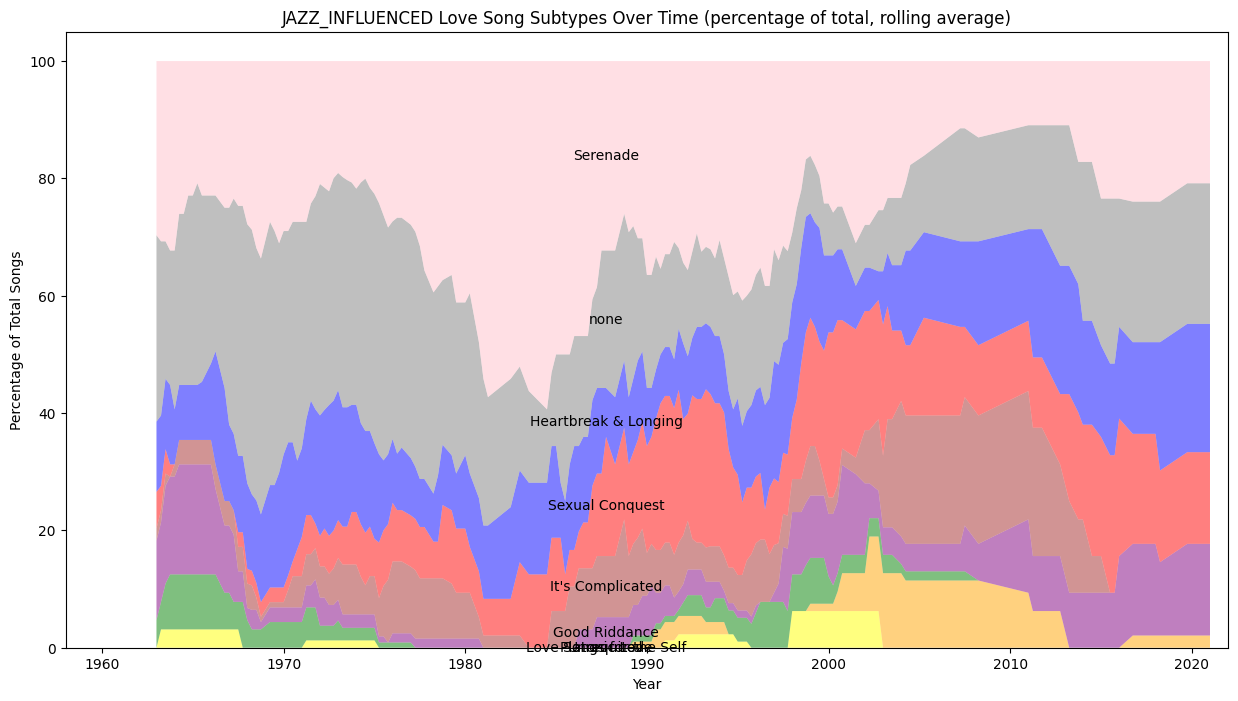

In [56]:
stacked_bars_over_time(df[df.generic_genre == 'JAZZ_INFLUENCED'], title_prepend='JAZZ_INFLUENCED')

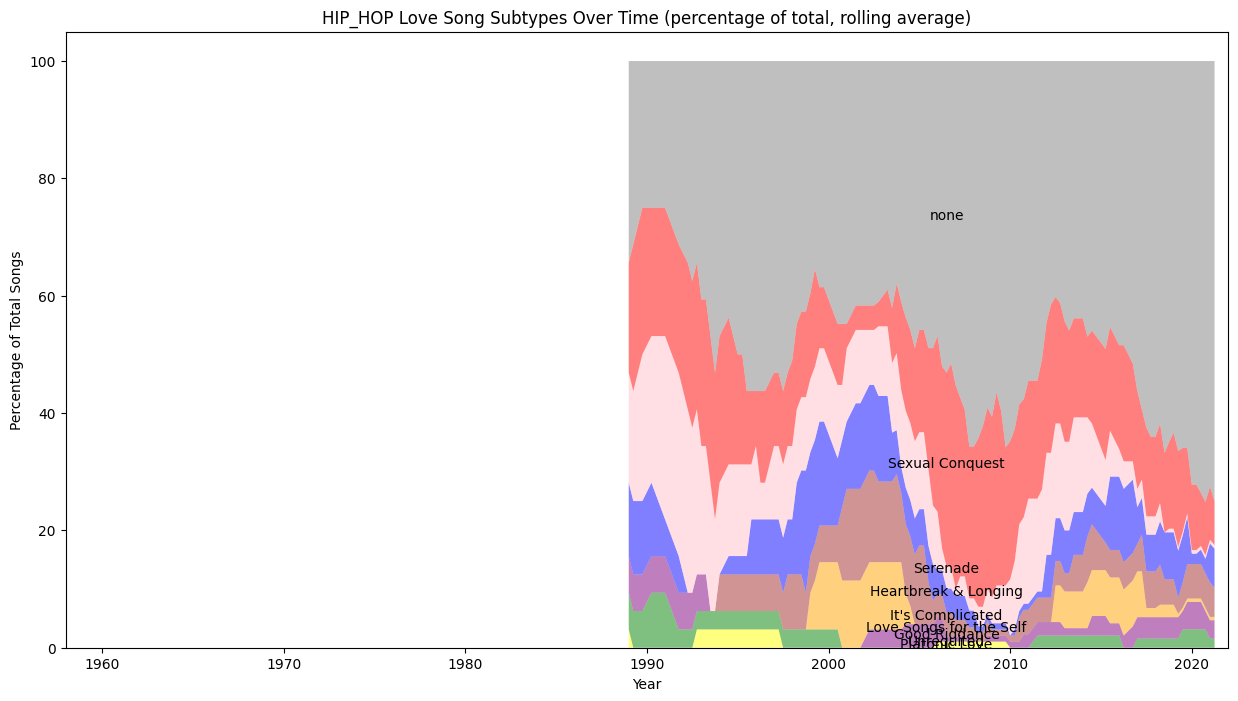

In [53]:
stacked_bars_over_time(df[df.generic_genre == 'HIP_HOP'], title_prepend='HIP_HOP')

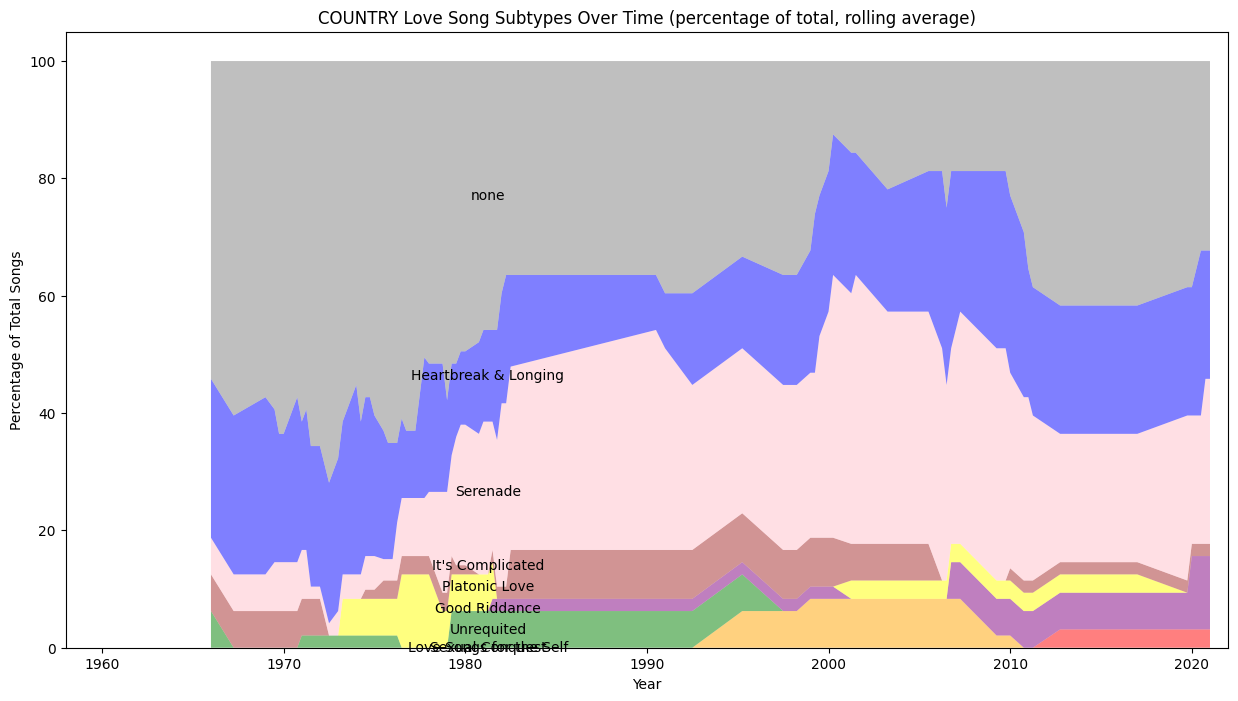

In [71]:
stacked_bars_over_time(df[df.generic_genre == 'COUNTRY'], title_prepend='COUNTRY')

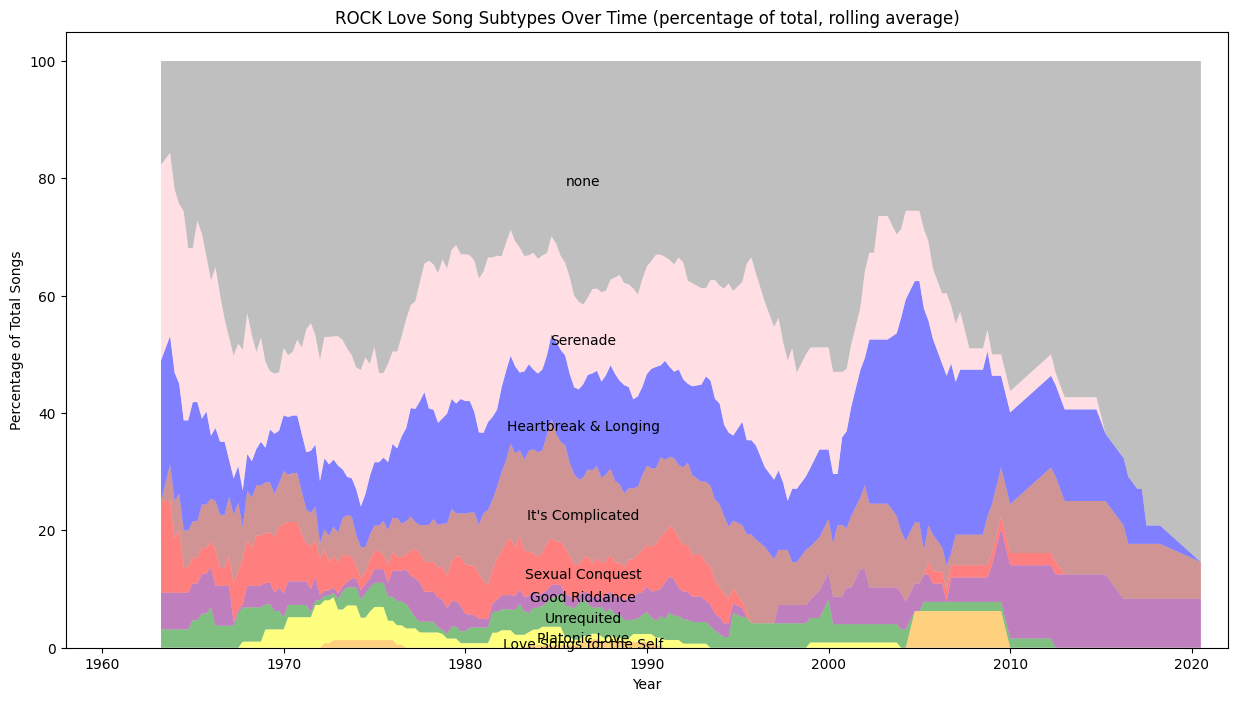

In [54]:
stacked_bars_over_time(df[df.generic_genre == 'ROCK'], title_prepend='ROCK')

# Comparing Percentage of Type by gender: pink shade means *women use it more*, blue means men do

In [65]:
def plot_gender_percentage(df, love_song_type, rolling_window=12):
    # Filter the DataFrame for the specified love song subtype
    filtered_df = df[df['love_song_sub_type'] == love_song_type]

    # Group by gender and date rounded to four-month intervals, and calculate the count for each
    grouped_count_df = filtered_df.groupby(['gender', (filtered_df['date_as_decimal']*3).round(0)/3]).size().reset_index(name='count')

    # Group by gender and date rounded to four-month intervals, and calculate the total songs for each gender
    total_gender_count_df = df.groupby(['gender', (df['date_as_decimal']*3).round(0)/3]).size().reset_index(name='total_count')

    # Merge the count and total count DataFrames
    merged_df = grouped_count_df.merge(total_gender_count_df, on=['gender', 'date_as_decimal'])

    # Calculate the percentage
    merged_df['percentage'] = (merged_df['count'] / merged_df['total_count']) * 100

    # Pivot to get gender as columns
    pivoted_df = merged_df.pivot(index='date_as_decimal', columns='gender', values='percentage').fillna(0)

    # Apply rolling mean to smooth the lines
    rolling_female_percentage = pivoted_df['f'].rolling(window=rolling_window, min_periods=1).mean()
    rolling_male_percentage = pivoted_df['m'].rolling(window=rolling_window, min_periods=1).mean()

    # Get time values
    time = pivoted_df.index

    # Initialize figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot lines for female and male
    ax.plot(time, rolling_female_percentage, color="pink", label="Female")
    ax.plot(time, rolling_male_percentage, color="blue", label="Male")

    # Fill area when female > male with pink
    ax.fill_between(time, rolling_female_percentage, rolling_male_percentage, where=(rolling_female_percentage > rolling_male_percentage), 
                    interpolate=True, color="pink", alpha=0.25)

    # Fill area when female <= male with blue
    ax.fill_between(time, rolling_female_percentage, rolling_male_percentage, where=(rolling_female_percentage <= rolling_male_percentage), 
                    interpolate=True, color="blue", alpha=0.25)

    ax.set_title(f'Percentage of {love_song_type} for Each Gender Over Time')
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage of Songs')
    ax.legend()
    plt.show()


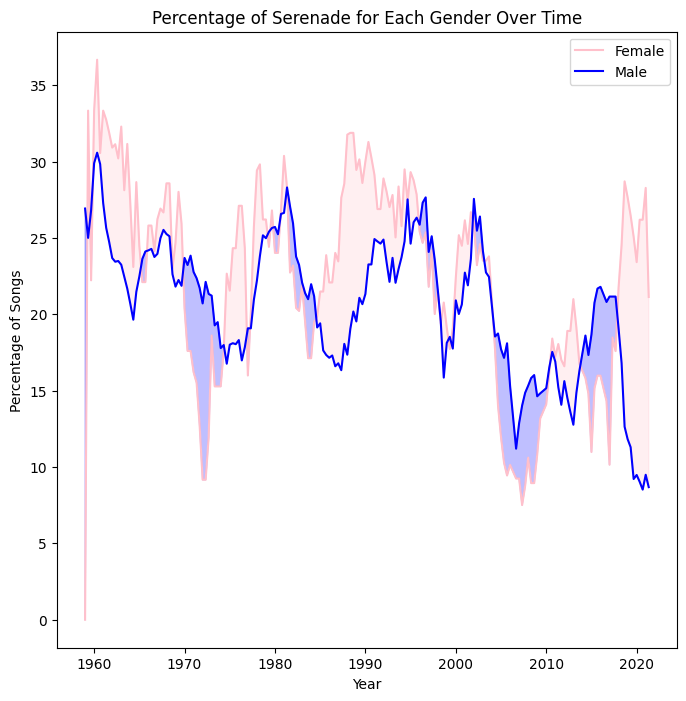

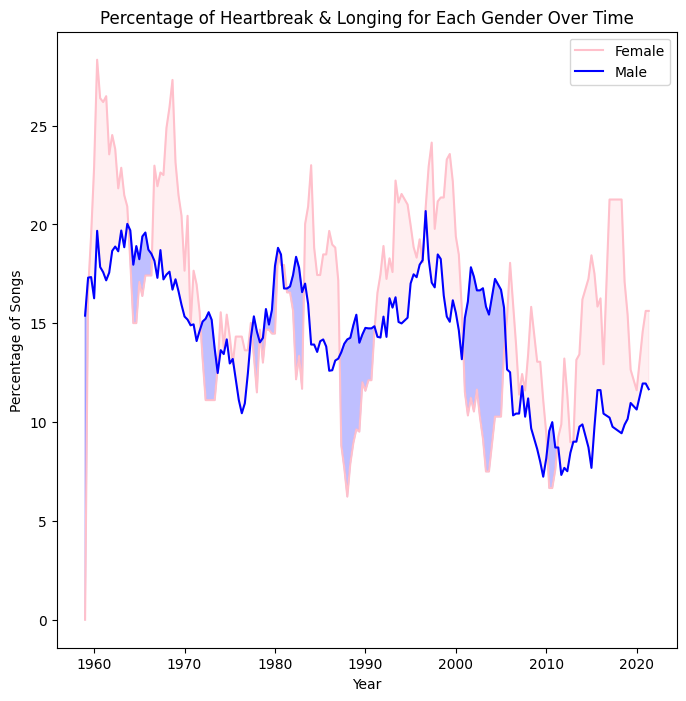

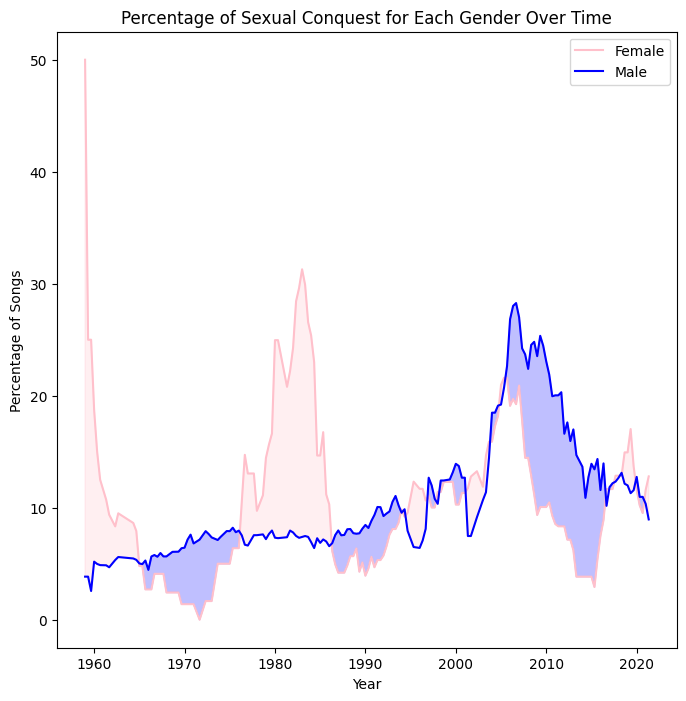

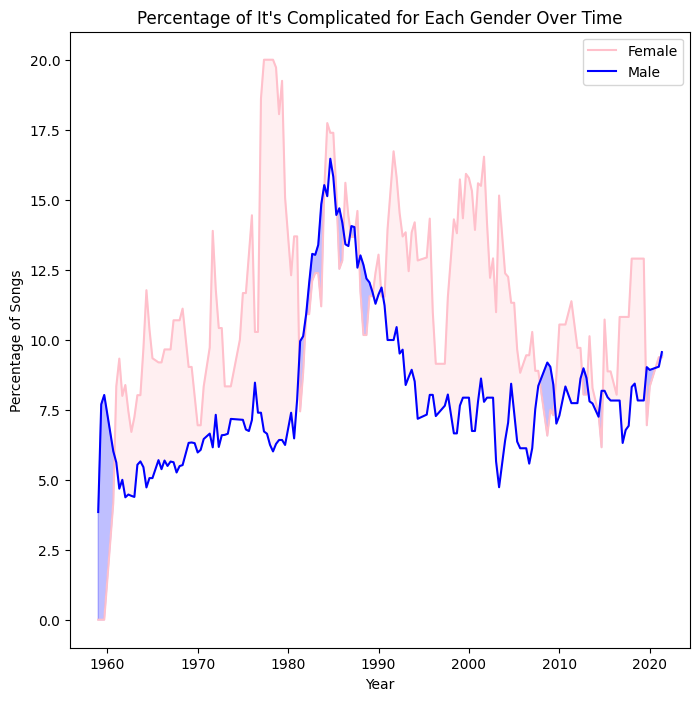

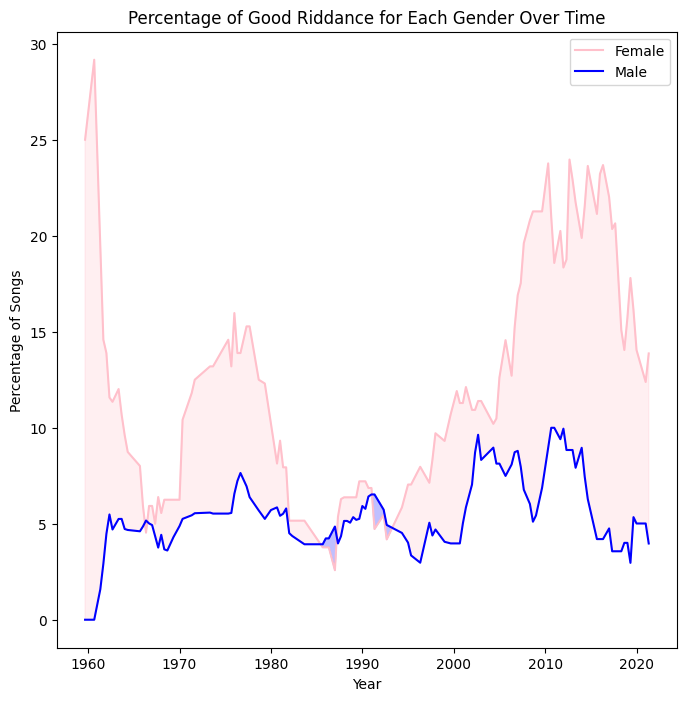

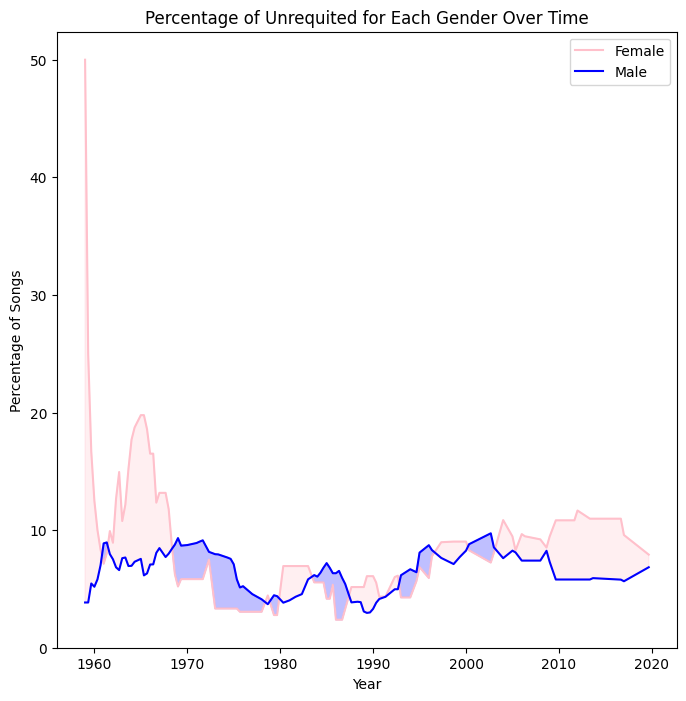

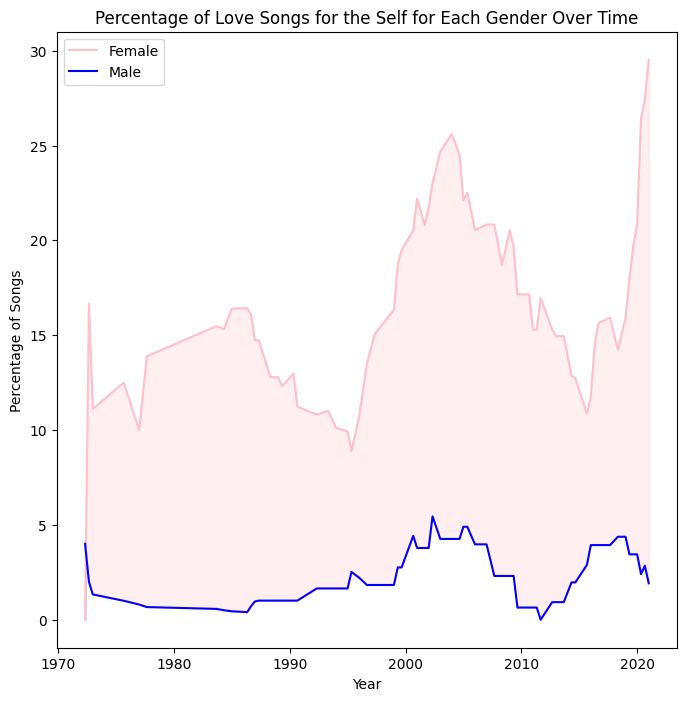

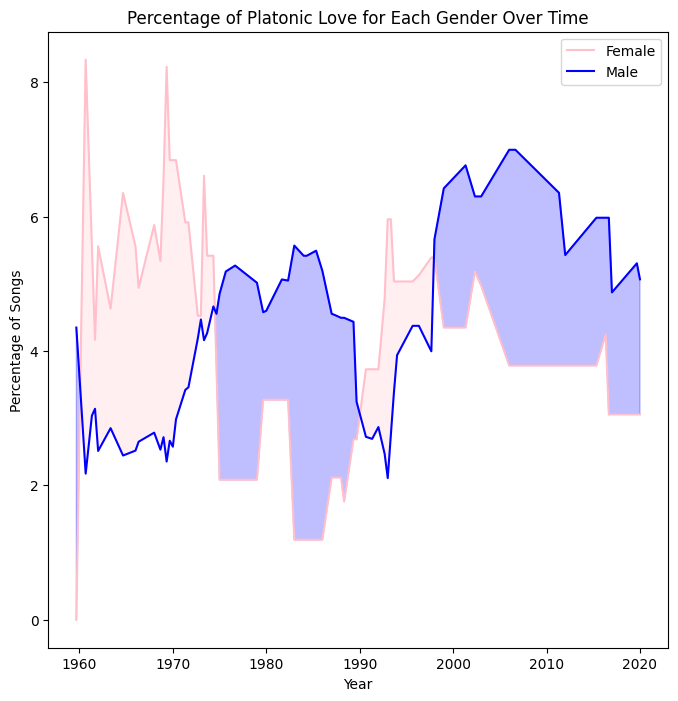

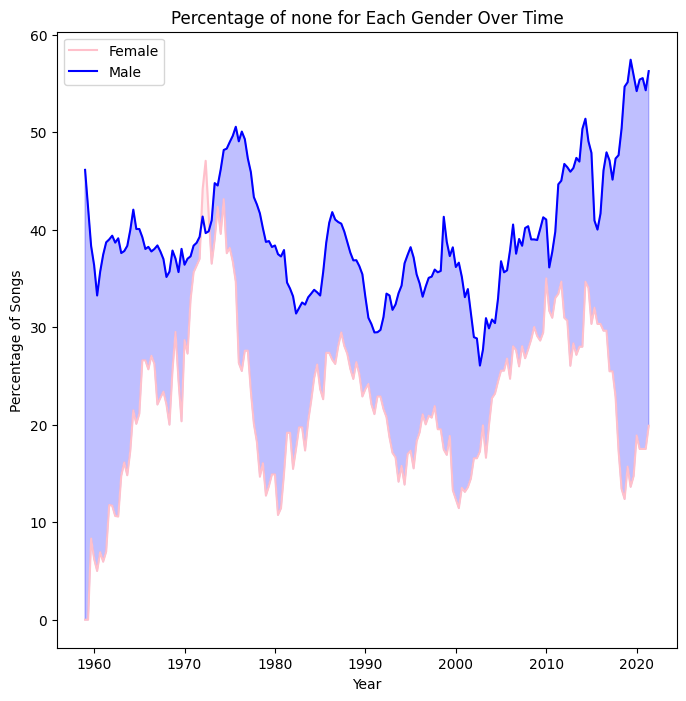

In [70]:
for subtype in LOVE_SONG_SUB_TYPES:
    plot_gender_percentage(df, subtype)

# Look at artists

In [15]:
for subtype in LOVE_SONG_SUB_TYPES:
    # Filter the DataFrame to include only the specified subtype
    subtype_df = df[df['love_song_sub_type']==subtype]

    # Group by artist, then count the occurrences and sort 
    artist_counts = subtype_df.groupby('performer').size().sort_values(ascending=False)

    # Print the top 5 artists for each subtype with their counts
    top_artists = artist_counts.head(5)
    print(f"Top 5 artists for subtype '{subtype}':")
    print(top_artists)

    # Compute percentages
    total_songs_by_top_artists = df[df['performer'].isin(top_artists.index)].groupby('performer').size()
    percentages = (top_artists / total_songs_by_top_artists) * 100

    print("\nPercentage of total songs by these artists that belong to this subtype:")
    print(percentages)
    print("\n")

Top 5 artists for subtype 'Serenade':
performer
The Beatles      12
Taylor Swift      9
Janet Jackson     8
Madonna           8
Mariah Carey      7
dtype: int64

Percentage of total songs by these artists that belong to this subtype:
performer
Janet Jackson    47.058824
Madonna          22.222222
Mariah Carey     33.333333
Taylor Swift     36.000000
The Beatles      38.709677
dtype: float64


Top 5 artists for subtype 'Heartbreak & Longing':
performer
The Supremes     7
Mariah Carey     7
Barry Manilow    6
Taylor Swift     5
Brenda Lee       5
dtype: int64

Percentage of total songs by these artists that belong to this subtype:
performer
Barry Manilow    54.545455
Brenda Lee       38.461538
Mariah Carey     33.333333
Taylor Swift     20.000000
The Supremes     50.000000
dtype: float64


Top 5 artists for subtype 'Sexual Conquest':
performer
Rod Stewart                           4
Donna Summer                          4
Ariana Grande                         4
Captain & Tennille        

# Top artists

In [16]:
import re
def split_on_featuring(s):
    parts = re.split('(?i)featuring', s)
    if parts:
        return parts[0].strip()
    return s
def split_on_with(s):
    parts = re.split('(?i)with', s)
    if parts:
        return parts[0].strip()
    return s

df['primary_performer'] = df['performer'].apply(split_on_featuring).apply(split_on_with)

In [17]:
# Get count of each love song sub-type for each performer
song_counts = pd.crosstab(df['primary_performer'], df['love_song_sub_type'])

# Get total song count for each performer
total_song_counts = df['primary_performer'].value_counts()

# Combine these into one dataframe
agg_df = pd.concat([total_song_counts, song_counts], axis=1, sort=False)

# Fill NaNs with 0 (these occur where a performer has no songs of a given type)
agg_df = agg_df.fillna(0)

# Calculate percentages of total for each love song sub-type
for sub_type in LOVE_SONG_SUB_TYPES:
    agg_df[f'{sub_type}_pct'] = round(agg_df[sub_type] / agg_df['primary_performer'] * 100)

# Maintain the existing "gender" column
most_common_gender = df.groupby('primary_performer')['gender'].agg(lambda x:x.value_counts().index[0])

# Join most common gender to agg_df
agg_df = agg_df.join(most_common_gender)

# Select top 50 artists by total song count
top_artists_df = agg_df.nlargest(50, 'primary_performer')
top_artists_df


,primary_performer,Good Riddance,Heartbreak & Longing,It's Complicated,Love Songs for the Self,Platonic Love,Serenade,Sexual Conquest,Unrequited,none,Serenade_pct,Heartbreak & Longing_pct,Sexual Conquest_pct,It's Complicated_pct,Good Riddance_pct,Unrequited_pct,Love Songs for the Self_pct,Platonic Love_pct,none_pct,gender
Madonna,38,2,1,3,1,0,9,3,2,17,24.0,3.0,8.0,8.0,5.0,5.0,3.0,0.0,45.0,f
The Beatles,32,0,1,3,0,1,12,2,0,13,38.0,3.0,6.0,9.0,0.0,0.0,0.0,3.0,41.0,m
Drake,28,1,4,2,1,0,3,0,0,17,11.0,14.0,0.0,7.0,4.0,0.0,4.0,0.0,61.0,m
Taylor Swift,28,2,6,2,2,0,9,0,2,5,32.0,21.0,0.0,7.0,7.0,7.0,7.0,0.0,18.0,f
Michael Jackson,25,0,3,1,0,2,4,0,0,15,16.0,12.0,0.0,4.0,0.0,0.0,0.0,8.0,60.0,m
Stevie Wonder,25,0,2,2,0,0,7,2,1,11,28.0,8.0,8.0,8.0,0.0,4.0,0.0,0.0,44.0,m
Mariah Carey,24,2,7,1,2,1,9,1,0,1,38.0,29.0,4.0,4.0,8.0,0.0,8.0,4.0,4.0,f
The Rolling Stones,23,0,5,4,0,0,2,3,0,9,9.0,22.0,13.0,17.0,0.0,0.0,0.0,0.0,39.0,m
Elvis Presley,23,1,4,2,0,0,8,2,1,5,35.0,17.0,9.0,9.0,4.0,4.0,0.0,0.0,22.0,m
Elton John,22,1,3,0,0,3,5,0,1,9,23.0,14.0,0.0,0.0,5.0,5.0,0.0,14.0,41.0,m


In [18]:
def top_50_artist_stacked_bars(top_artists_df, sort_by='Serenade'):
    # Sort by the percentage of the given song type
    top_artists_df = top_artists_df.sort_values(by=f'{sort_by}_pct', ascending=False)

    # Reorder the columns based on LOVE_SONG_SUB_TYPES such that sort_by is first
    ordered_sub_types = [sort_by] + [sub_type for sub_type in LOVE_SONG_SUB_TYPES if sub_type != sort_by]
    percentage_columns = [f'{sub_type}_pct' for sub_type in ordered_sub_types]
    colors = [COLOR_MAP[sub_type] for sub_type in ordered_sub_types]

    # Plotting code
    top_artists_df[percentage_columns].plot(
        kind='barh',
        stacked=True,
        figsize=(15,10),
        color=colors  # Assigning the reordered colors
    )
    plt.legend(ordered_sub_types)
    plt.title(f'Love Song Subtype Percentages for Top 50 Artists, sorted by {sort_by}')
    plt.xlabel('Percentage')
    plt.ylabel('Artist')
    plt.gca().invert_yaxis() # This is to maintain the top artist at the top after sorting
    plt.show()


## Comparing breakdowns for each artist, sorted by top performers for different categories

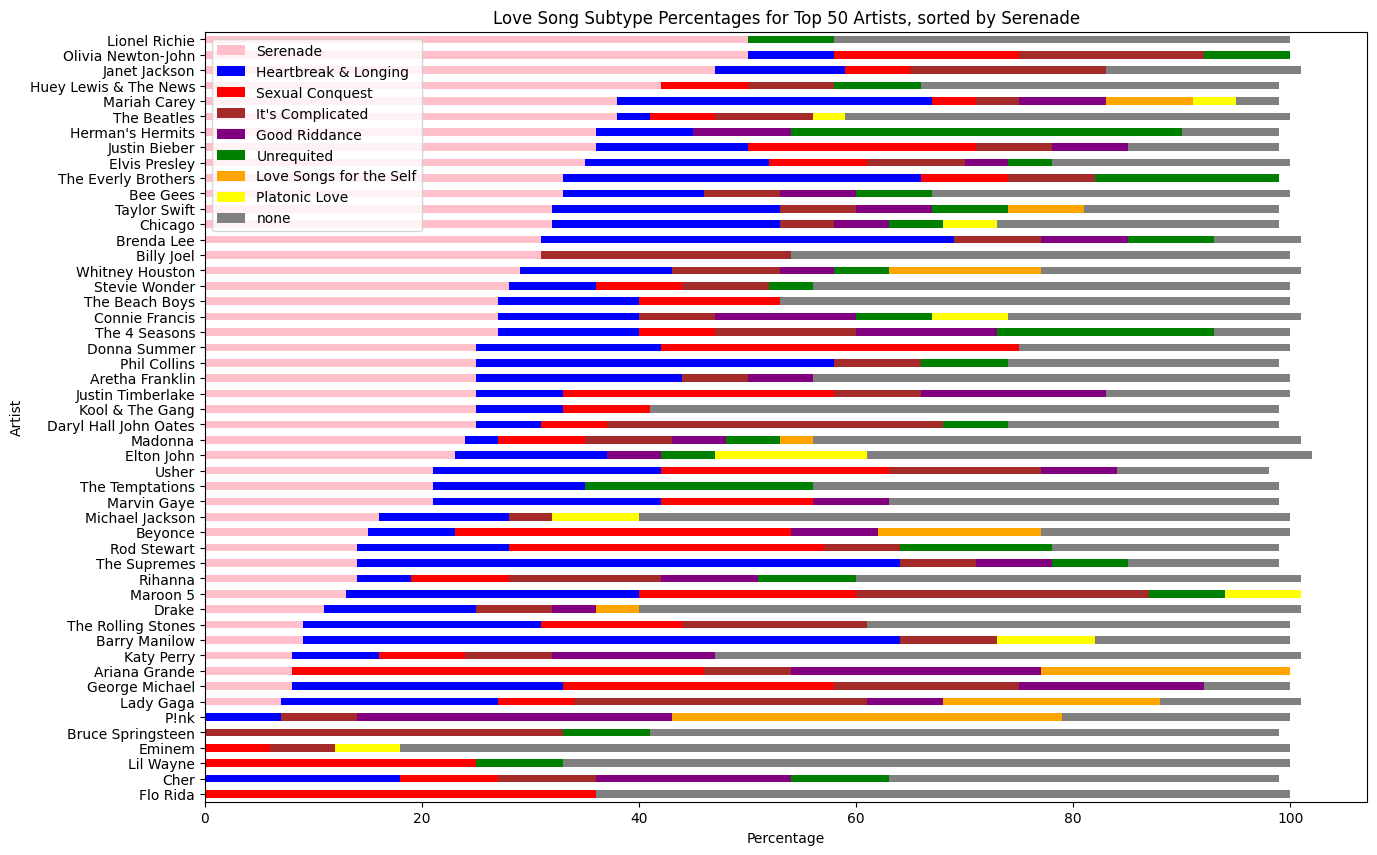

In [19]:
top_50_artist_stacked_bars(top_artists_df, sort_by='Serenade')

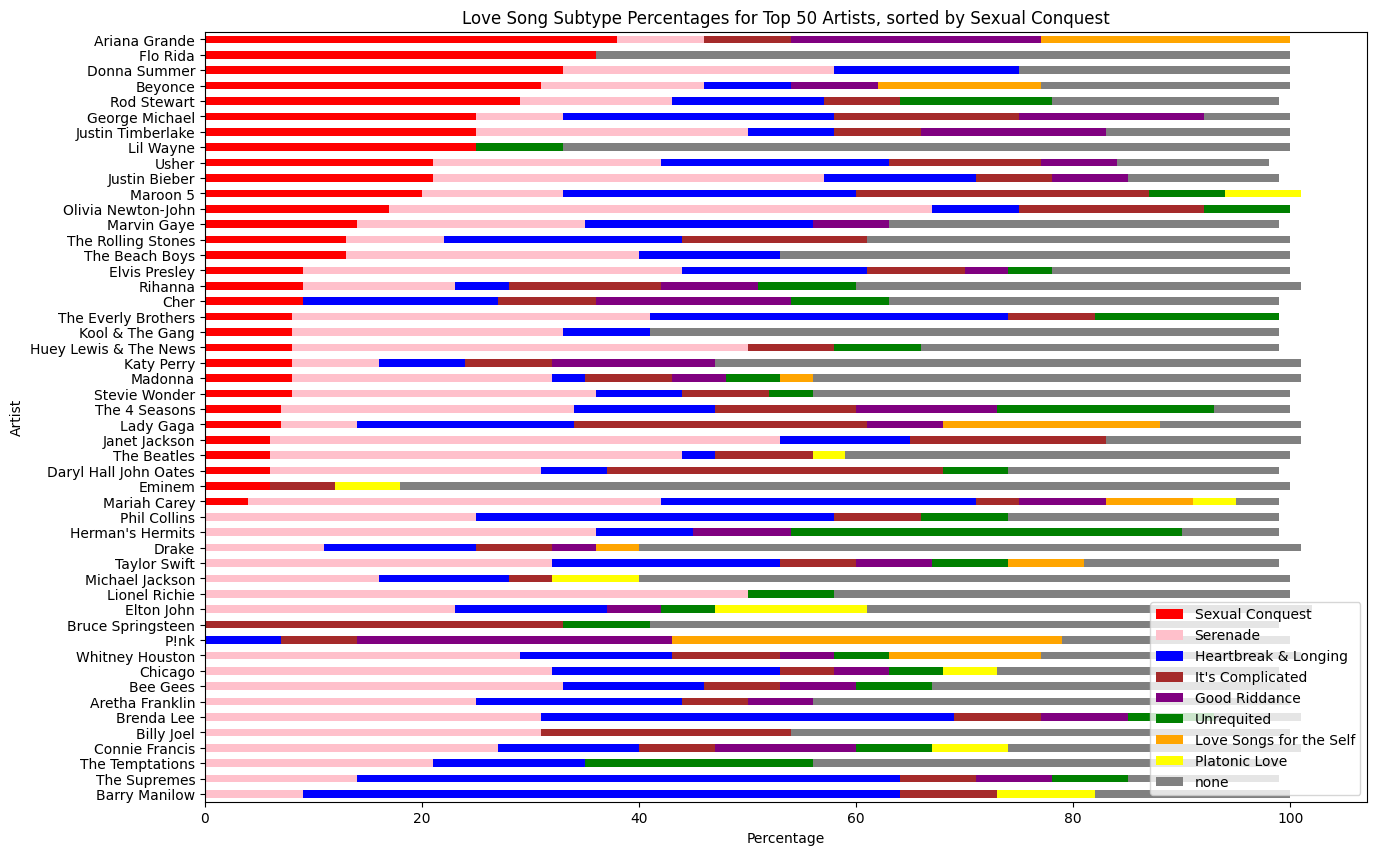

In [20]:
top_50_artist_stacked_bars(top_artists_df, sort_by='Sexual Conquest')

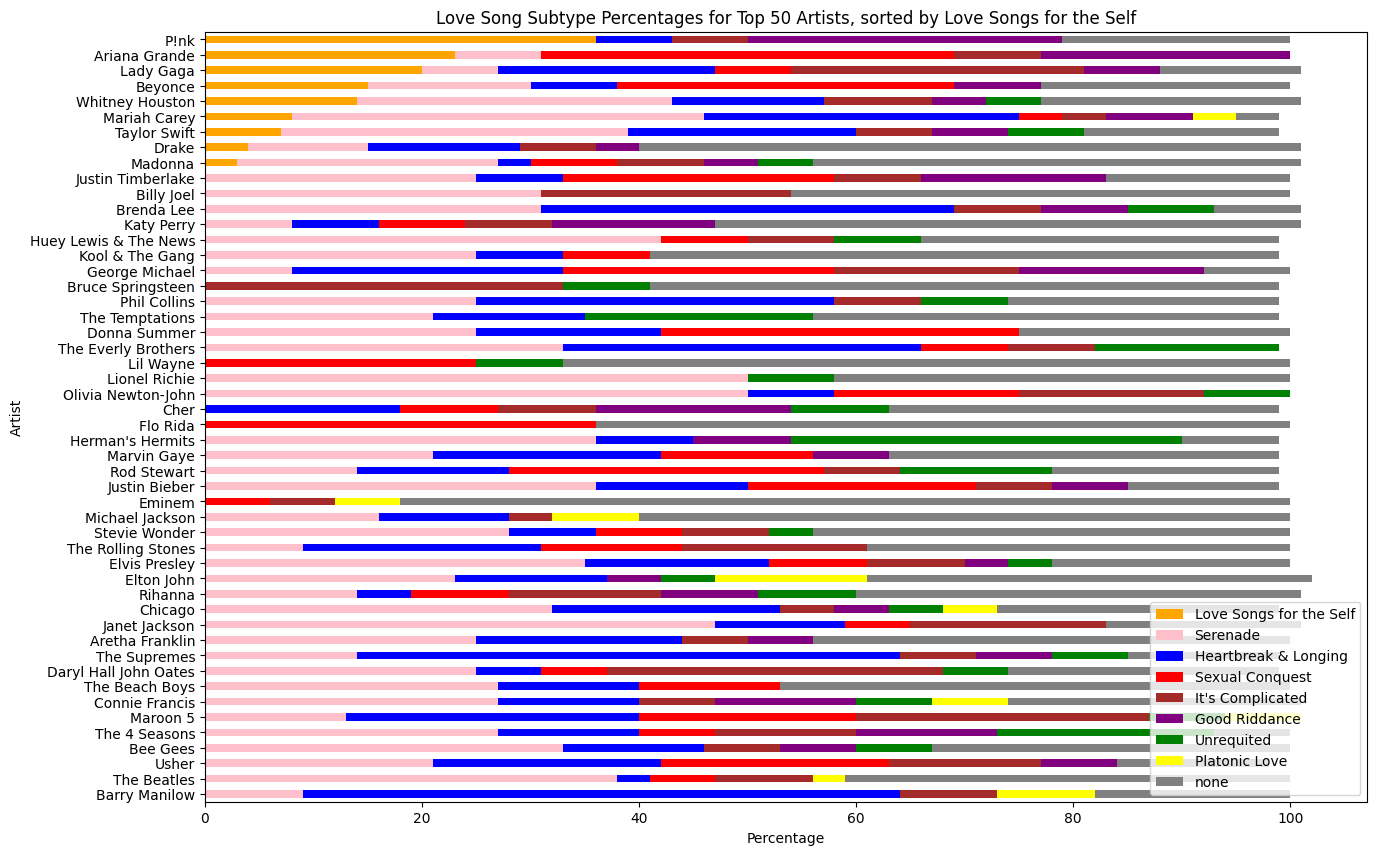

In [21]:
top_50_artist_stacked_bars(top_artists_df, sort_by='Love Songs for the Self')

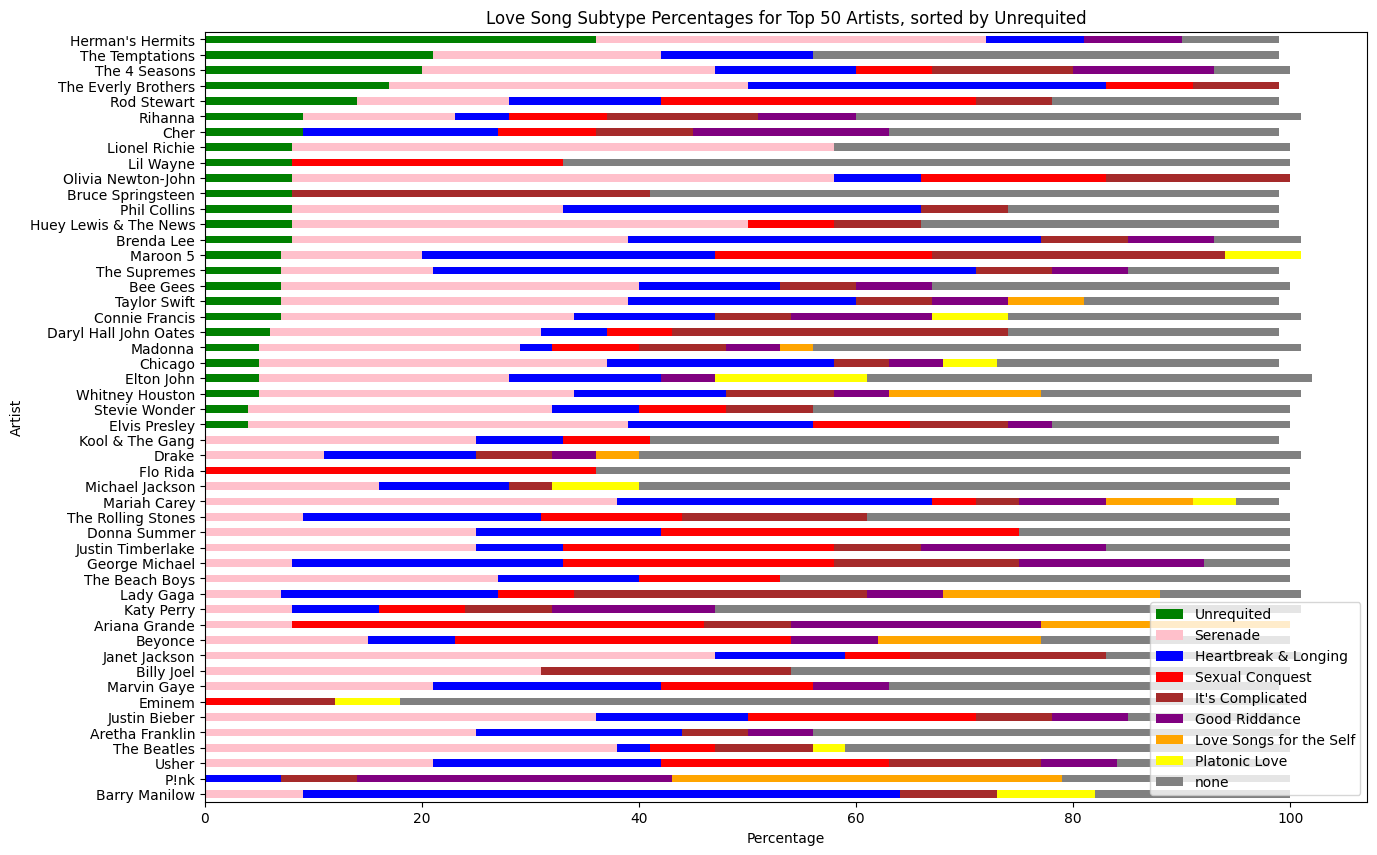

In [39]:
top_50_artist_stacked_bars(top_artists_df, sort_by='Unrequited')

In [22]:
def love_sogn_type_scatter_plot(top_artists_df, x, y):
    fig, ax = plt.subplots(figsize=(12, 8))

    # Define color mapping
    colors = {'f': 'pink', 'm': 'blue', 'x': 'gray'}

    # Loop through the top_artists_df DataFrame
    for index, row in top_artists_df.iterrows():
        ax.scatter(row[f'{x}_pct'], row[f'{y}_pct'],
                   s=row['primary_performer'] * 10, # size based on total number of songs
                   c=colors[row['gender']], # color based on gender
                   label=index, # label based on primary performer
                   alpha=0.6, edgecolors="w")

        # Add text label for each primary performer
        ax.text(row[f'{x}_pct'], row[f'{y}_pct'], index, fontsize=9)

    ax.set_xlabel(f'{x} Percentage')
    ax.set_ylabel(f'{y} Percentage')
    ax.set_title(f'{x} vs {y} by Primary Performer')
    plt.show()

## Exploring archetypes: looking at correlations between 2 love song types

### "Thank you, next"

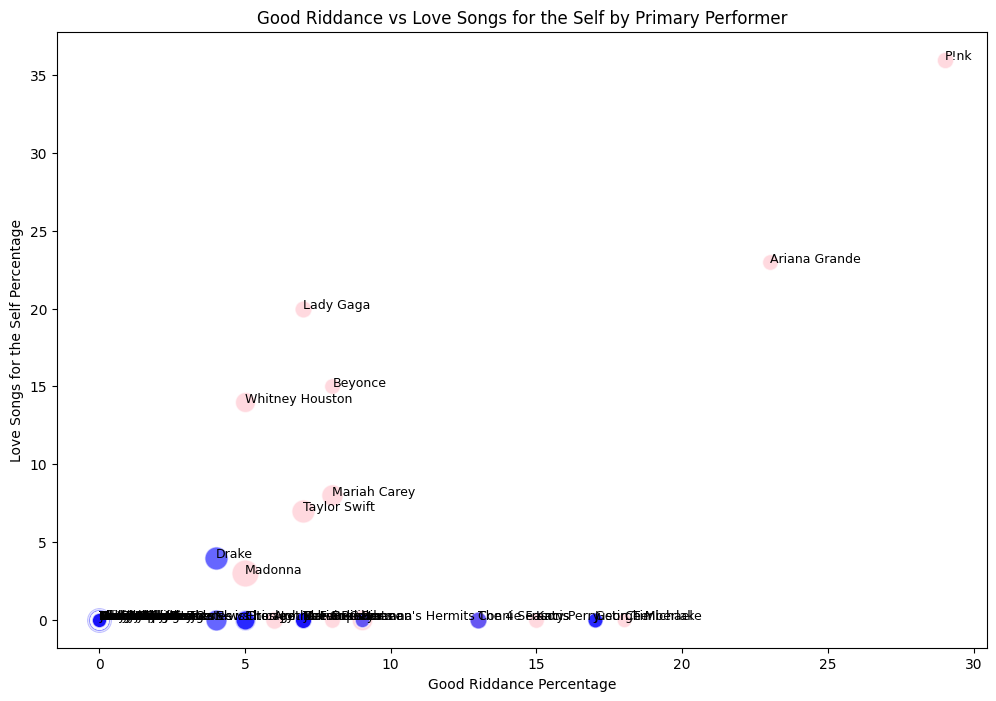

In [23]:
love_sogn_type_scatter_plot(top_artists_df, x='Good Riddance', y='Love Songs for the Self')

### "Let's get physical (physical)": what kind of archetypes do we see that do a lot of Sexual Conquering?

#### "Sex & the ~City~ Self"

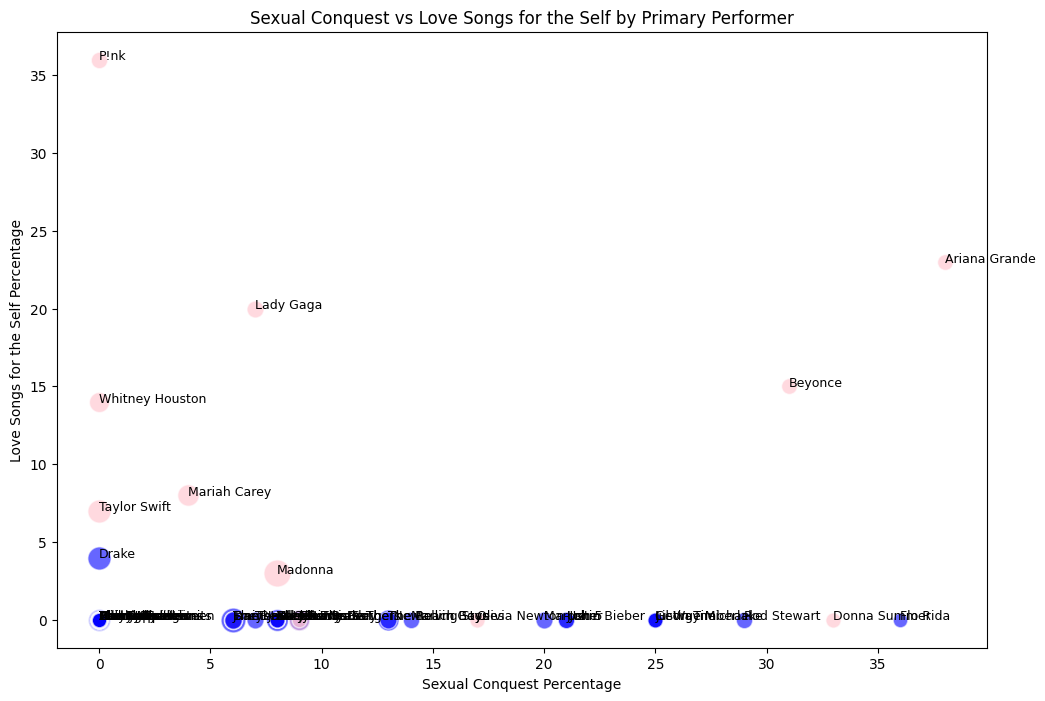

In [24]:
love_sogn_type_scatter_plot(top_artists_df, x='Sexual Conquest', y='Love Songs for the Self')

#### "It's sex... or I'm not talking about romance." also the opposite: "It's sex... or it's romance-related"

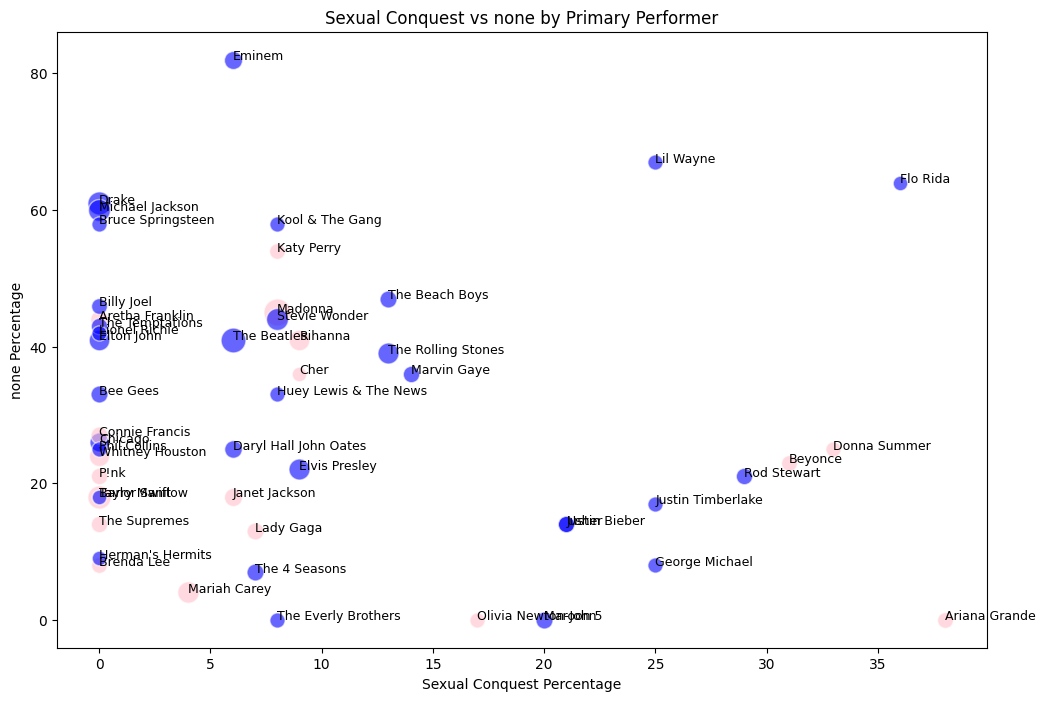

In [25]:
love_sogn_type_scatter_plot(top_artists_df, x='Sexual Conquest', y='none')

### Let's look at the Serenade's associations...

#### "Fall in love/bed"

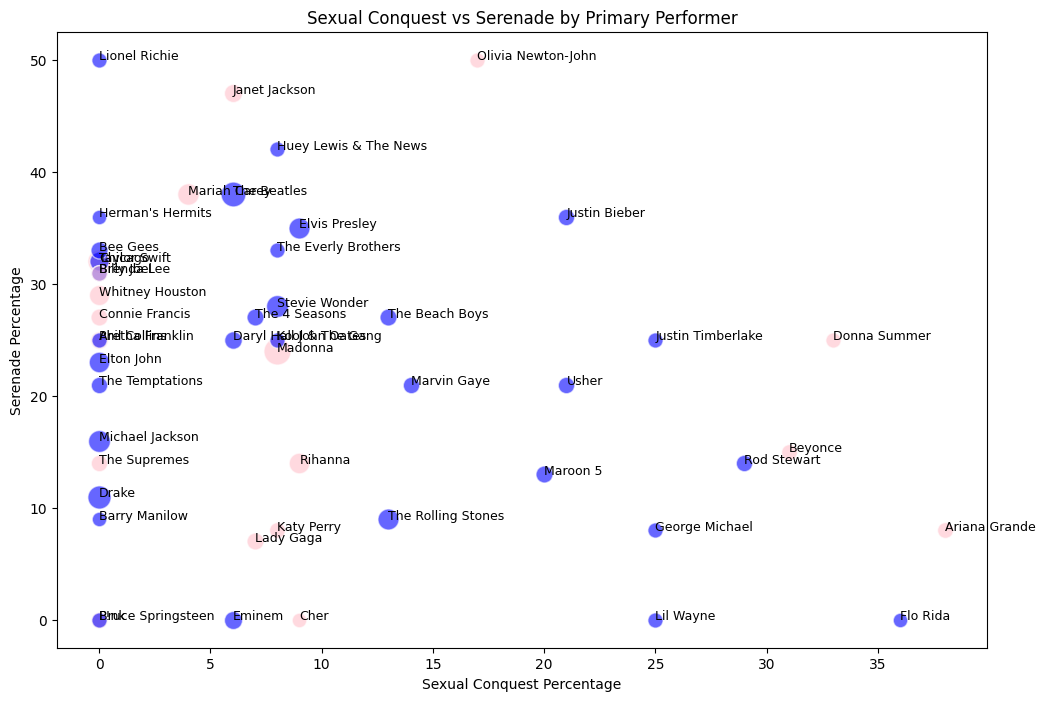

In [26]:
love_sogn_type_scatter_plot(top_artists_df, x='Sexual Conquest', y='Serenade')

#### "Highs... and lows"

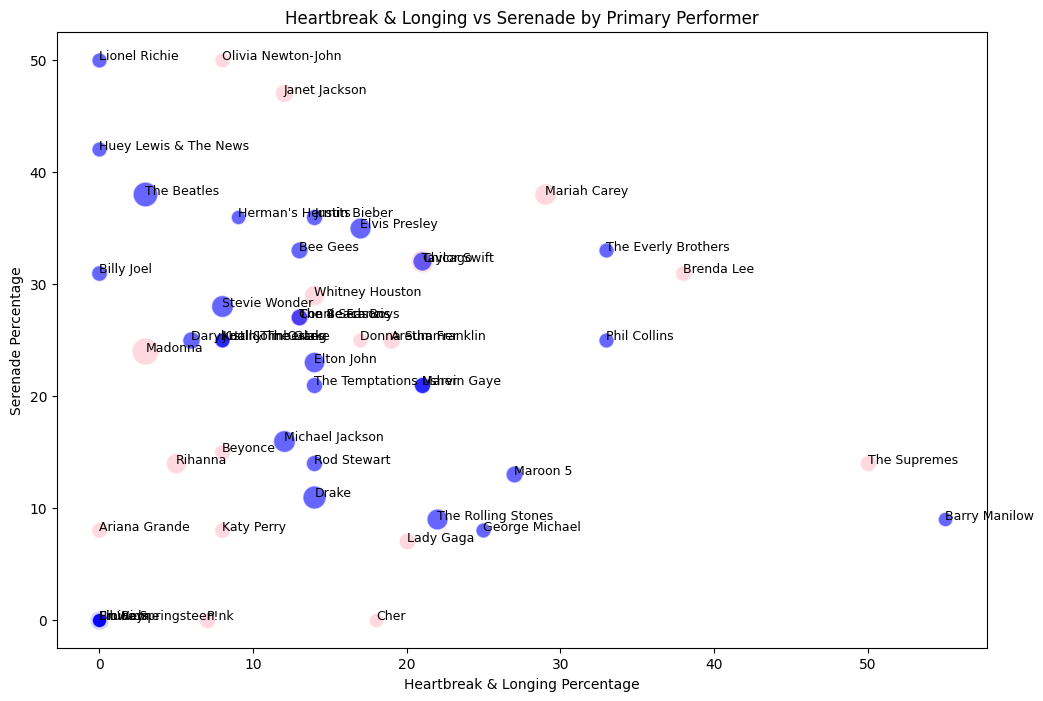

In [27]:
love_sogn_type_scatter_plot(top_artists_df, x='Heartbreak & Longing', y='Serenade')

### "sadboi"

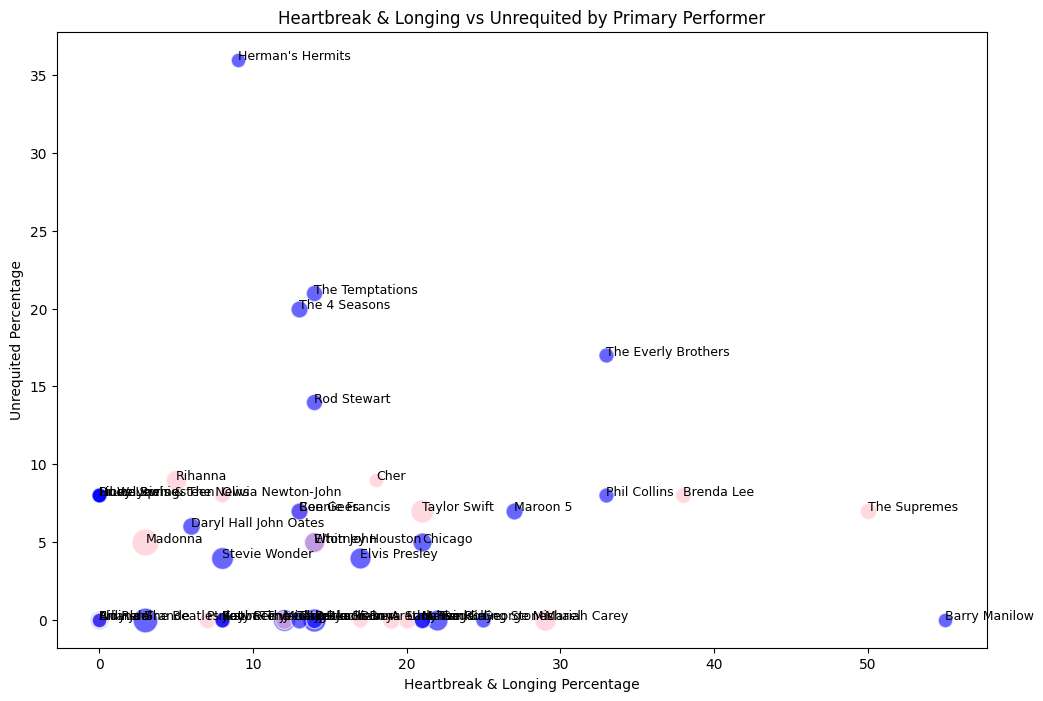

In [28]:
love_sogn_type_scatter_plot(top_artists_df, x='Heartbreak & Longing', y='Unrequited')

### "Relationships, man..."

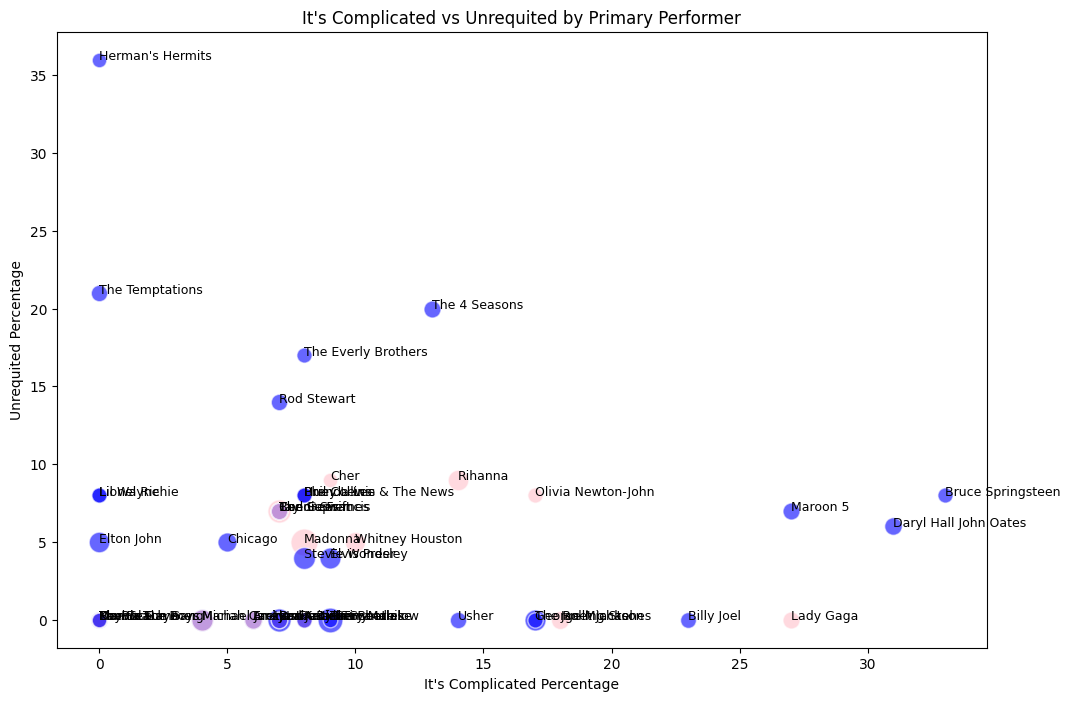

In [29]:
love_sogn_type_scatter_plot(top_artists_df, x="It's Complicated", y='Unrequited')

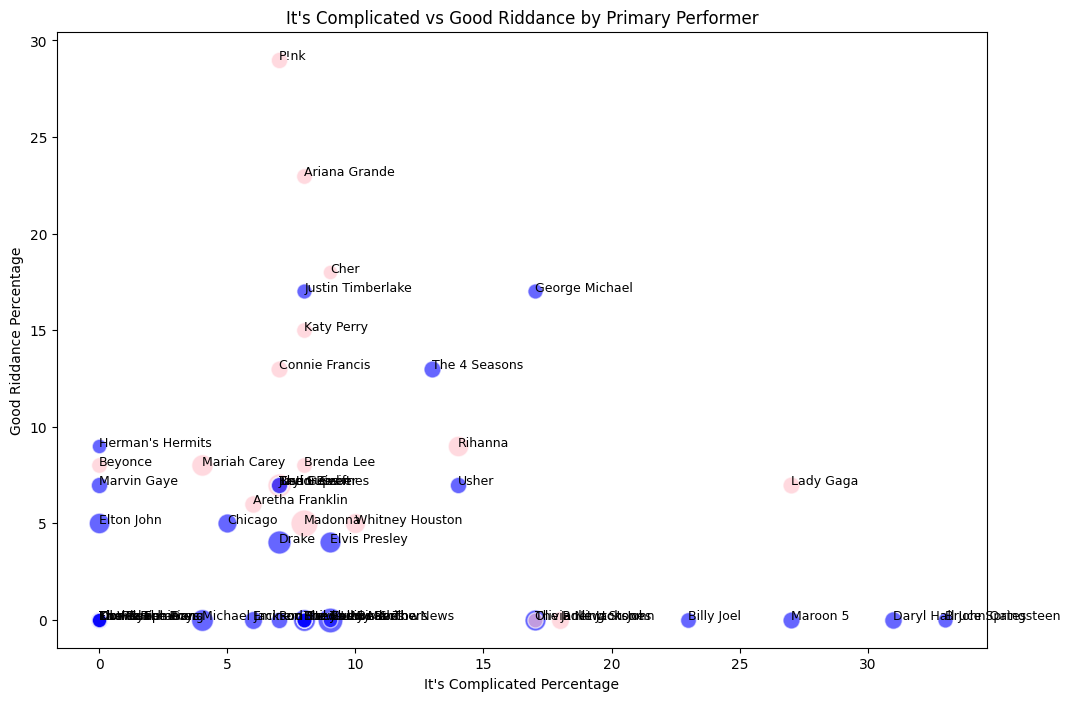

In [30]:
love_sogn_type_scatter_plot(top_artists_df, x="It's Complicated", y='Good Riddance')

### "(when you've transcended it all)" ... doesn't exist! Instead, we get "men wax platonic, women self-love"

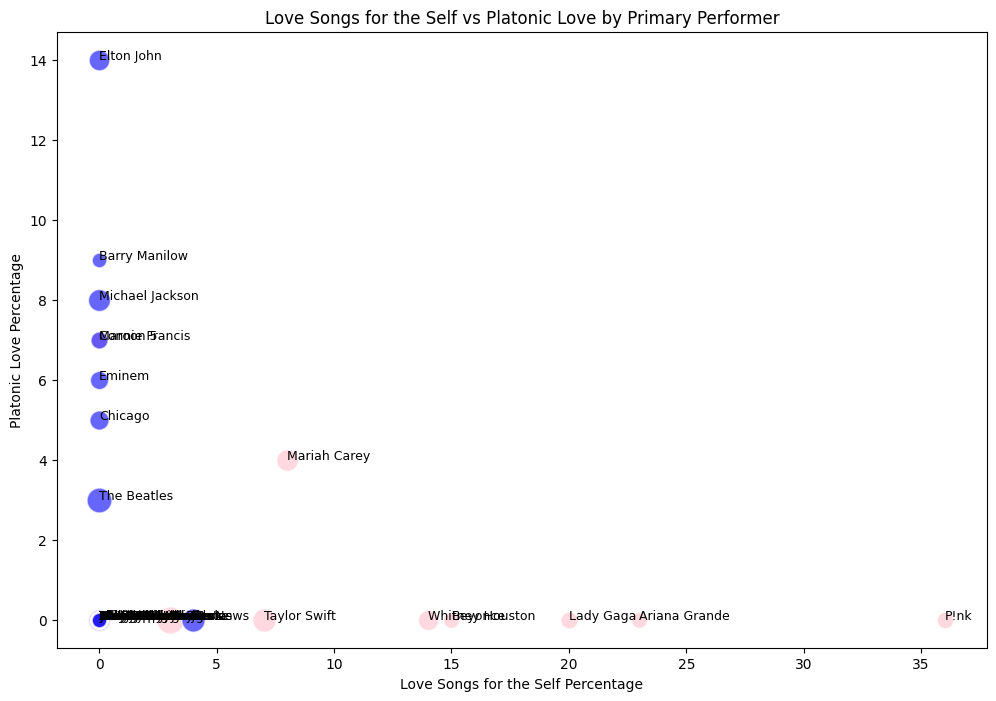

In [31]:
love_sogn_type_scatter_plot(top_artists_df, x="Love Songs for the Self", y='Platonic Love')

# One hit wonders

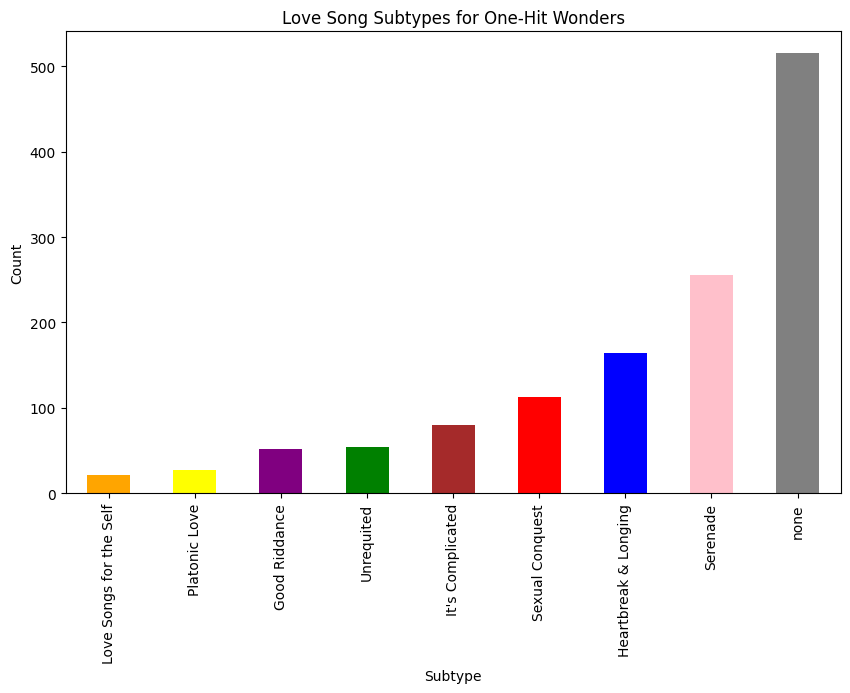

In [32]:
def one_hit_wonders(df):
    # Filter primary performers who have only one song
    one_hit_wonders = df[df['primary_performer'].map(df['primary_performer'].value_counts()) == 1]

    # Count love song sub-types for the one-hit wonders
    sub_type_counts = one_hit_wonders['love_song_sub_type'].value_counts().sort_values()

    # Get the colors from COLOR_MAP
    colors = [COLOR_MAP[sub_type] for sub_type in sub_type_counts.index]

    # Plot the bar chart
    sub_type_counts.plot(kind='bar', color=colors, figsize=(10, 6))
    plt.title('Love Song Subtypes for One-Hit Wonders')
    plt.xlabel('Subtype')
    plt.ylabel('Count')
    plt.show()

one_hit_wonders(df)